In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_churn_dataset.csv')

# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Cust0001,Male,0,No,No,67,Yes,No,Fiber optic,No internet service,...,No internet service,Yes,No internet service,No internet service,Month-to-month,Yes,Electronic check,69.13,4642.02,No
1,Cust0002,Male,0,No,Yes,4,Yes,No phone service,DSL,Yes,...,No,Yes,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),37.61,153.25,Yes
2,Cust0003,Female,0,Yes,No,39,Yes,No,DSL,No,...,No internet service,No internet service,Yes,Yes,Month-to-month,No,Bank transfer (automatic),55.36,2167.44,No
3,Cust0004,Female,0,No,No,12,Yes,No,No,No,...,No,No,No internet service,Yes,One year,No,Credit card (automatic),35.74,410.79,No
4,Cust0005,Female,0,No,Yes,35,Yes,No phone service,DSL,No internet service,...,Yes,No,No internet service,No,Two year,Yes,Electronic check,43.36,1497.35,No


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap

sns.set(style="whitegrid")
%matplotlib inline

In [6]:
df = pd.read_csv('customer_churn_dataset.csv')
print("Dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
df.head()

Dataset shape: (1000, 21)
Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Cust0001,Male,0,No,No,67,Yes,No,Fiber optic,No internet service,...,No internet service,Yes,No internet service,No internet service,Month-to-month,Yes,Electronic check,69.13,4642.02,No
1,Cust0002,Male,0,No,Yes,4,Yes,No phone service,DSL,Yes,...,No,Yes,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),37.61,153.25,Yes
2,Cust0003,Female,0,Yes,No,39,Yes,No,DSL,No,...,No internet service,No internet service,Yes,Yes,Month-to-month,No,Bank transfer (automatic),55.36,2167.44,No
3,Cust0004,Female,0,No,No,12,Yes,No,No,No,...,No,No,No internet service,Yes,One year,No,Credit card (automatic),35.74,410.79,No
4,Cust0005,Female,0,No,Yes,35,Yes,No phone service,DSL,No internet service,...,Yes,No,No internet service,No,Two year,Yes,Electronic check,43.36,1497.35,No


In [16]:
df = pd.read_csv('customer_churn_dataset_corrected.csv')

print("Dataset shape:", df.shape)
print("Missing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
df.head()

Dataset shape: (1000, 21)
Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
Paperless

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Cust0001,Male,0,No,No,67,Yes,No,Fiber optic,No internet service,...,No internet service,Yes,No internet service,No internet service,Month-to-month,Yes,Electronic check,69.13,4642.02,No
1,Cust0002,Male,0,No,Yes,4,Yes,No phone service,DSL,Yes,...,No,Yes,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),37.61,153.25,Yes
2,Cust0003,Female,0,Yes,No,39,Yes,No,DSL,No,...,No internet service,No internet service,Yes,Yes,Month-to-month,No,Bank transfer (automatic),55.36,2167.44,No
3,Cust0004,Female,0,No,No,12,Yes,No,No,No,...,No,No,No internet service,Yes,One year,No,Credit card (automatic),35.74,410.79,No
4,Cust0005,Female,0,No,Yes,35,Yes,No phone service,DSL,No internet service,...,Yes,No,No internet service,No,Two year,Yes,Electronic check,43.36,1497.35,No


C:\Users\B U Bharath\AppData\Local\Temp\ipykernel_19028\3233242550.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


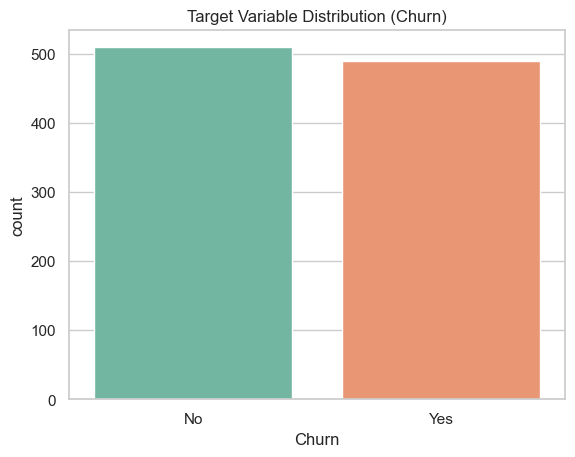

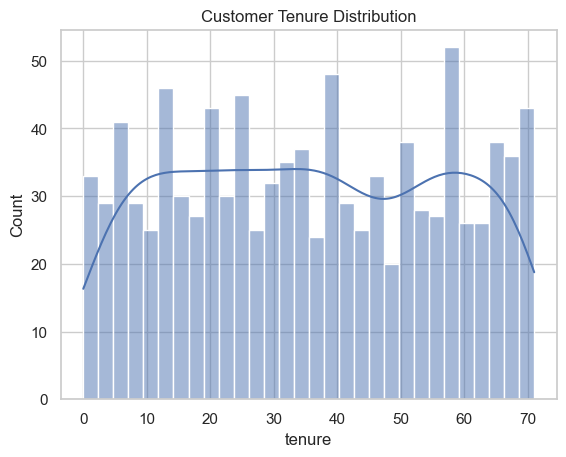

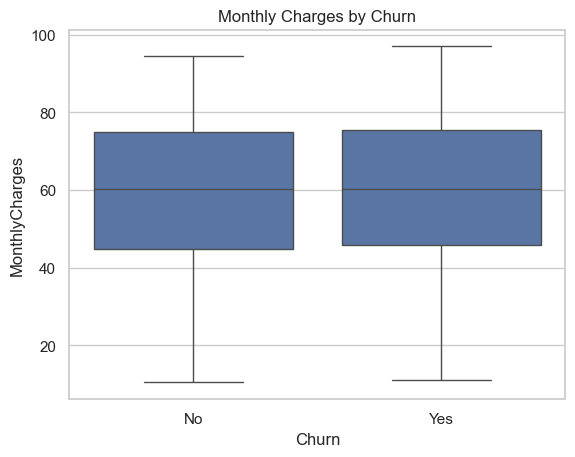

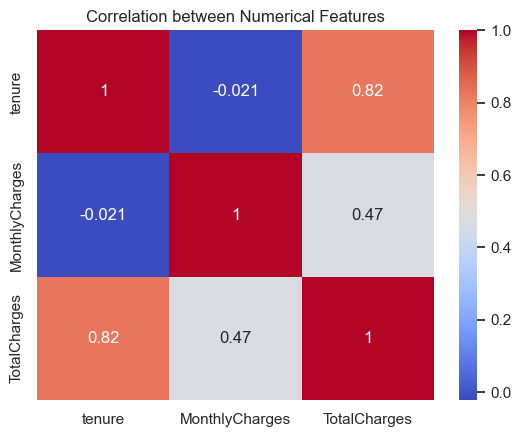

In [17]:
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Target Variable Distribution (Churn)')
plt.show()

sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Customer Tenure Distribution')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()

In [19]:
print(f'X_clean shape: {X_clean.shape}')
print(f'y_clean shape: {y_clean.shape}')

X_clean shape: (0, 19)
y_clean shape: (0,)


In [20]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [24]:
# List columns that must not have missing values for modeling
required_cols = ['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Drop rows with missing values ONLY in these columns
df_clean = df.dropna(subset=required_cols)

X_clean = df_clean.drop(['customerID', 'Churn'], axis=1)
y_clean = df_clean['Churn']

print(f'After cleaning, shape of X_clean: {X_clean.shape}')
print(f'After cleaning, shape of y_clean: {y_clean.shape}')

After cleaning, shape of X_clean: (1000, 19)
After cleaning, shape of y_clean: (1000,)


In [29]:
# Check NaNs in target
print("Missing values in y:", y.isnull().sum())

# Remove rows where target or any of the features have NaNs
df_clean = df.dropna(subset=df.columns)  # drops any row with NaN in ANY column

# Re-extract X and y after clean
X = df_clean.drop(['customerID', 'Churn'], axis=1)
y = df_clean['Churn']

print(f"Cleaned data shape: {X.shape}")

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

Missing values in y: 1000
Cleaned data shape: (1000, 19)


In [26]:
X = df_clean.drop(['customerID', 'Churn'], axis=1)
y = df_clean['Churn']

In [27]:
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.78      0.58      0.66       102
           1       0.65      0.83      0.73        98

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.72      0.70      0.70       200



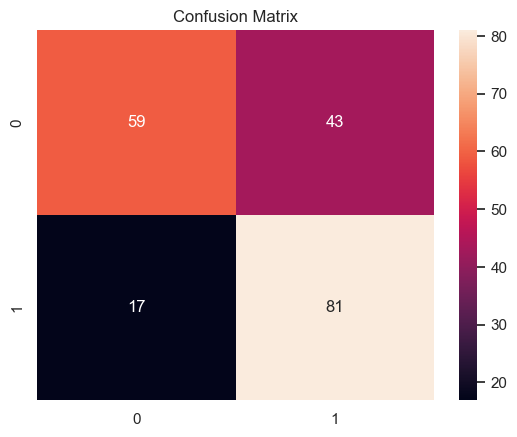

ROC AUC Score: 0.735


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.3f}')

C:\Users\B U Bharath\AppData\Local\Temp\ipykernel_19028\3264973988.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


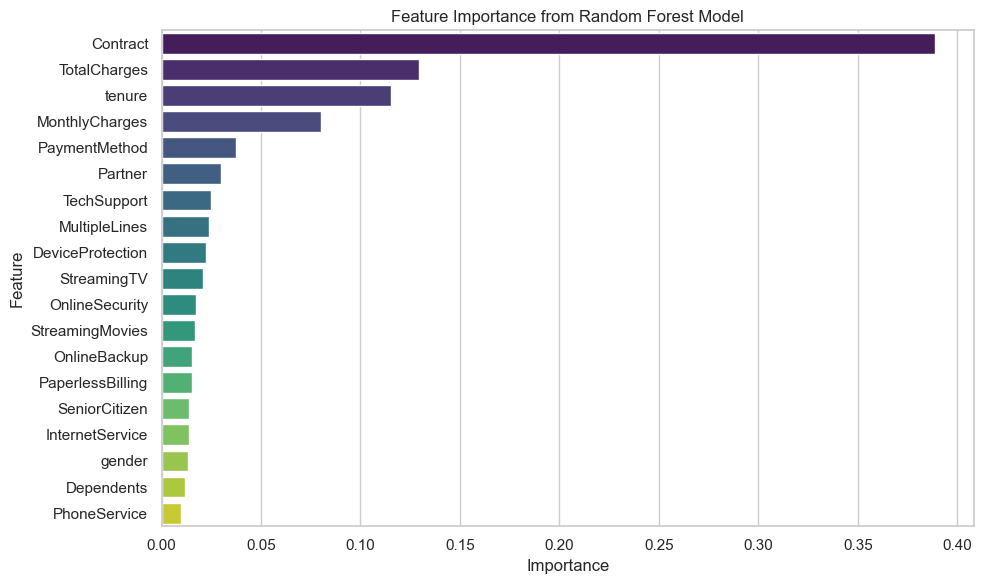

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

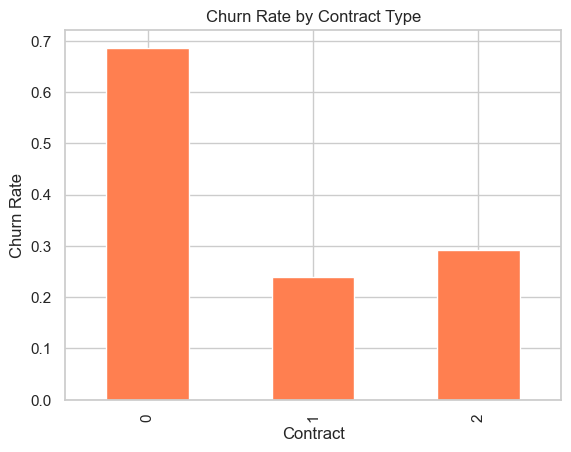

In [40]:
churn_rate_by_contract = df.groupby('Contract')['Churn'].mean()
churn_rate_by_contract.plot(kind='bar', color='coral')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

In [41]:
import joblib
joblib.dump(best_rf, 'customer_churn_rf_model.pkl')
print("Model saved as customer_churn_rf_model.pkl")

Model saved as customer_churn_rf_model.pkl
